In [10]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model as lm
from statsmodels.formula.api import ols

loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

In [2]:
loansData.describe()

,Amount.Requested,Amount.Funded.By.Investors,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
count,2500.000000,2500.000000,2499.000000,2498.000000,2498.000000,2498.000000
mean,12406.500000,12001.573236,5688.931321,10.075661,15244.559648,0.906325
std,7801.544872,7745.320754,3963.118185,4.508644,18308.549795,1.231036
min,1000.000000,-0.010000,588.500000,2.000000,0.000000,0.000000
25%,6000.000000,6000.000000,3500.000000,7.000000,5585.750000,0.000000
50%,10000.000000,10000.000000,5000.000000,9.000000,10962.000000,0.000000
75%,17000.000000,16000.000000,6800.000000,13.000000,18888.750000,1.000000
max,35000.000000,35000.000000,102750.000000,38.000000,270800.000000,9.000000


In [5]:
clean_loan_data=loansData.dropna()  
clean_loan_data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


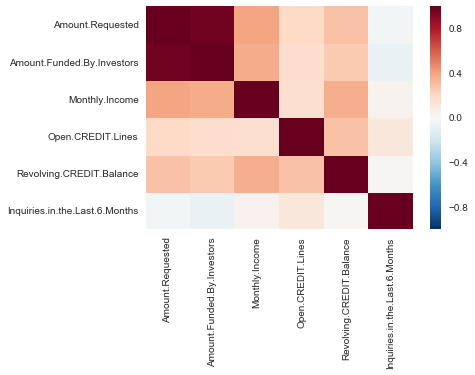

In [22]:
sns.heatmap(clean_loan_data.corr())

In [26]:
clean_loan_data = clean_loan_data.rename(columns={'Amount.Funded.By.Investors': 'amount_funded', 'Amount.Requested': 'amount_req',
                                                  'prestige_4.0': 'prestige_4'})
oloan_fund = ols('amount_funded ~ amount_req', clean_loan_data).fit()
print oloan_fund